# Helper to view Output data

In [1]:
import os
import pandas as pd

from sciplot import sciplot
%matplotlib inline

In [2]:
NAME = "users-parametric"
IS_BATCH = False
IS_PARAMETRIC = True

base_folder = os.getcwd()
output_folder = os.path.join(base_folder, 'output')
result_folder = os.path.join(output_folder, NAME)

print(f"Reading info of {result_folder}")

Reading info of /home/enrique/Desktop/git-repos/PoF_Simulation_PYTHON/output/users-parametric


In [3]:
print("Processing results...")
if IS_BATCH:
    # Read mean-result csv:
    mean_result_csv = os.path.join(result_folder, 'output-result.csv')
    df_mean_result = pd.read_csv(mean_result_csv)
    print("Mean results of batch execution:")
    print(df_mean_result.T)
    print("-------")    
elif IS_PARAMETRIC:
    print("Plotting parametric result!")
    # Read parametric result:
    mean_parametric_csv = os.path.join(result_folder, 'output-parametric.csv')
    df_parametric_result = pd.read_csv(mean_parametric_csv)
    print("Mean results of parametric simulation: ")
    print(df_parametric_result.T)
    print("-----")
else:
    print("What is?")

Processing results...
Plotting parametric result!
Mean results of parametric simulation: 
                                       0            1            2
Users                          30.000000    60.000000    80.000000
small_cell_ocupacy              3.250521     3.925864     3.980342
small_cell_overflow             2.221616     4.880217     5.873969
small_cell_consumption[W]       3.112838     3.551812     3.587222
throughput[mbps]             1592.134917  2658.229797  2981.781680
throughput_no_battery[mbps]  1005.250825  1329.040582  1402.639176
throughput_only_macro[mbps]    52.755652    65.725857    66.230297
battery_mean[Ah]                3.035297     2.488507     2.271145
NMacroCells                     3.000000     3.000000     3.000000
NFemtoCells                    20.000000    20.000000    20.000000
per_served_femto               23.794900    24.614200    24.400600
per_in_area                    24.507300    25.349800    25.841600
per_time_served                96.84040

Plotting parametric result!


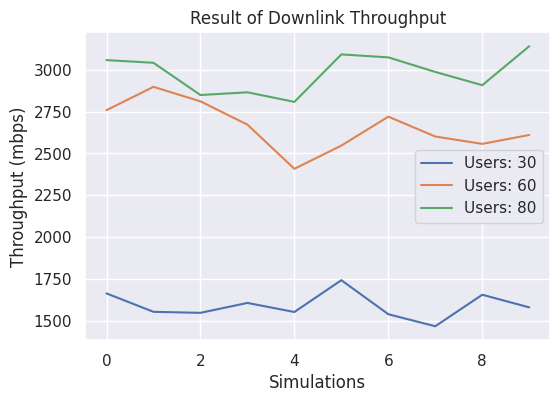

In [4]:
if IS_BATCH:
    # Read simulations means and show plot
    output_simulations_csv = os.path.join(result_folder, 'output-simulations.csv')
    df_simulations = pd.read_csv(output_simulations_csv)
    print(f"Batch execution with {df_simulations.shape[0]} simulations")
    
    # Plot Throughput Downlink
    traces = []
    traces.append(df_simulations['throughput[mbps]'])
    traces.append(df_simulations['throughput_no_battery[mbps]'])
    traces.append(df_simulations['throughput_only_macro[mbps]'])
    sciplot(x=range(0,df_simulations.shape[0]), y=traces,
            xlabel='Batch', ylabel='Throughput (mbps)', title='Result of Downlink Throughput',
            grid=True, style='dark', legend=True, label=['Normal', 
                                                         'Without batteries', 
                                                         'Only Macro-BTS'])
    
    # Show Percentages
    print("----")
    print(f"% of time served by a femto-Cell: \n{df_simulations['per_served_femto'].T} \n" )
    print(f"% of time in area of femto-Cell: \n{df_simulations['per_in_area'].T} \n" )
    print(f"% of time in area of femto-Cell, and served by femto-Cell: \n{df_simulations['per_time_served'].T} \n" )
    
    # Show remaining batt
    sciplot(x=range(0,df_simulations.shape[0]), y=df_simulations['remaining_batt'],
            xlabel='Batch', ylabel='Batteries', title='Number of remaining batteries before end simulation',
            grid=True, style='dark', legend=True, label=['Battery'])
    
elif IS_PARAMETRIC:
    print("Plotting parametric result!")
    traces_parametric = []
    for point in range(0, df_parametric_result.shape[0]):
        path_param = os.path.join(result_folder, NAME + f'-{point}', "output-simulations.csv")
        df_param = pd.read_csv(path_param)
        traces_parametric.append(df_param["throughput[mbps]"])
    
    sciplot(x=range(0,traces_parametric[0].shape[0]), y=traces_parametric,
            xlabel='Simulations', ylabel='Throughput (mbps)', title='Result of Downlink Throughput',
            grid=True, style='dark', legend=True, label=['Users: 30', 
                                                         'Users: 60', 
                                                         'Users: 80'])
else:
    print("What is?")
